Load Ranger data generated by BeamworksStrata:

In [1]:
# import the ranger class
from ranger_data import *

# initialise a ranger class object

# load ranger data
r = ranger()
r.load_data('.\data')


Loading 00000015.bmp: 100%|██████████| 14/14 [00:04<00:00,  3.04it/s]


Range Shifter and Buildup WETs can be specified when loading data:

In [2]:
# load ranger data with predfined range shifter and buildup WETs
r2 = ranger()
r2.load_data('.\data', RS='RS 5cm', buildup='PTFE 13.27')

Loading 00000015.bmp: 100%|██████████| 14/14 [00:04<00:00,  3.03it/s]


Check the beam orientation is correct in the ranger images. **The beam must travel up from the bottom of the image**:

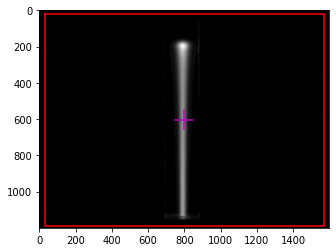

Beam image orientation: BOTTOM


In [3]:
# display the first image (indexed from 0 to n-1)
r.plot_img(0)

# check loaded image sequence's orientation
r.check_orientation()
print("Beam image orientation: "+r.orientation)

Plot the first image's IDD:

All IDDs displayed in raw format


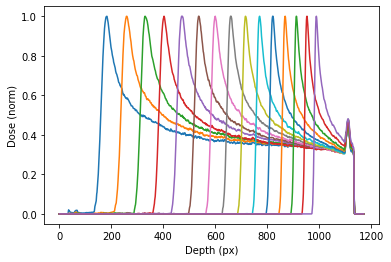

IDDs with legend


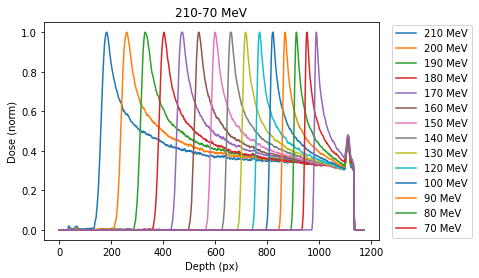

Single IDD referenced as an index from 0 to n


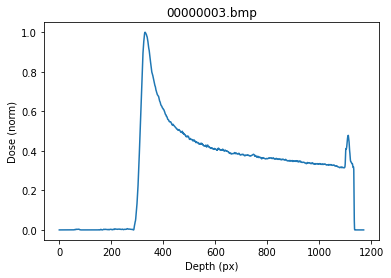

x-axis reversed


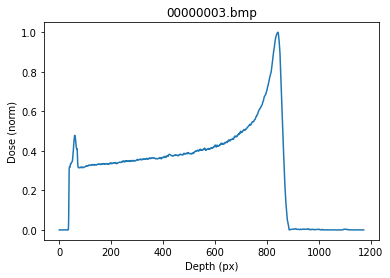

In [2]:
# display IDDs
print('All IDDs displayed in raw format')
r.plot_idd(axis=0) # all IDDs displayed in raw format
print('IDDs with legend')
r.plot_idd(axis=0,E=[210,200,190,180,170,160,150,140,130,120,100,90,80,70]) # IDDs with legend
print('Single IDD referenced as an index from 0 to n')
r.plot_idd(2, axis=0) # single IDD referenced as an index from 0 to n
print('x-axis reversed')
r.plot_idd(2, axis=-1) # x-axis reversed

List IDD metrics calculated from the .bmp images (in mm):

In [3]:
print('### Ranger D80 measurements (mm) ###')
for i in r.metrics_mm['D80']:
    print(i)

### Ranger D80 measurements (mm) ###
282.3314426456362
259.2491304551239
237.6464536614394
216.0437768677549
195.9207354708981
176.38954823277234
157.4502151533777
139.3986633120797
122.53081978824385
105.95890334377353
91.16254937549647
76.95804956595046
63.64133099450112
51.50832074051391
40.55901880398888


Compare Ranger D80s IDDs to reference data:

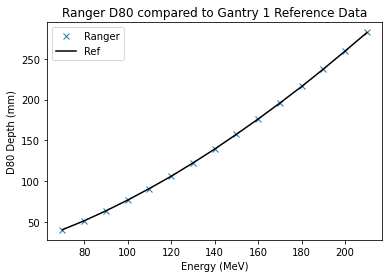

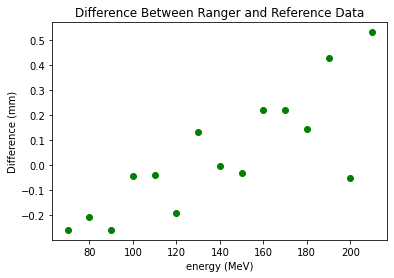

In [6]:
energies = r.reference_data['Energy'][-15:] # IDD energies
reference_d80 = r.reference_data['D80']['G1'][-15:] # reference data
ranger_d80 = r.metrics_mm['D80'] # ranger data
diff_d80 = np.array(ranger_d80) - np.array(reference_d80) # difference between ranger and reference

# plot D80s
plt.plot(energies,ranger_d80,'x')
plt.plot(energies,reference_d80,'k-')
plt.xlabel('Energy (MeV)')
plt.ylabel('D80 Depth (mm)')
plt.title('Ranger D80 compared to Gantry 1 Reference Data')
plt.legend(['Ranger', 'Ref'])
plt.show()

# plot differences
plt.plot(energies,diff_d80,'go')
plt.xlabel('energy (MeV)')
plt.ylabel('Difference (mm)')
plt.title('Difference Between Ranger and Reference Data')
plt.show()

Recalibrate Ranger's pixel to mm conversion using the `ranger.calibrate` function data in the `ranger.calibration` dictionary:

In [ ]:
# calibrate Ranger using parameters in the ranger.calibration dict
calib_params = r.calibrate()
print("Internal calibration performed successfully?: "+str(calib_params['results']['success']))
calib_params.pop('results')
print(calib_params)


Update the calibration using a user-supplied dictionary:

External calibration performed successfully?: True
{'pixel_pitch': 7.495282661334285, 'scintillator_WER': 0.45084507177638444, 'window_thickness': 10.108951286988832, 'window_WER': 1.7453772535961918, 'pixel_offset': 2.342172727697158}


Loading 00000015.bmp: 100%|██████████| 14/14 [00:03<00:00,  3.60it/s]


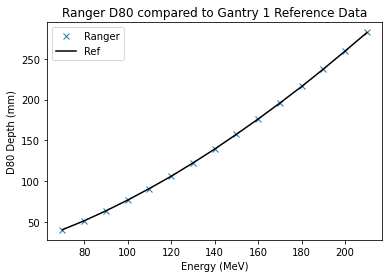

In [5]:
# calibrate Ranger using a user-supplied calibration dict
cal_dict = {
            'pixel_pitch': 8,
            'scintillator_WER': 0.5,
            'window_WER': 1.4,
            'window_thickness': 10,   # window thickness in pixels
            'pixel_offset': 3.6,
            'buildup': 0,
            'RS': 0,
            'CalD80':[      282.1,
                            259.5,
                            237.5,
                            216.2,
                            196.0,
                            176.5,
                            157.8,
                            139.9,
                            122.7,
                            106.5,
                            91.5,
                            77.4,
                            64.0,
                            51.7,
                            41.0],
            'RangerD80':[   944,
                            866,
                            793,
                            721,
                            653,
                            585,
                            522,
                            463,
                            404,
                            349,
                            300,
                            252,
                            207,
                            166,
                            127],
            }
calib_params2 = r.calibrate(cal_dict)
print("External calibration performed successfully?: "+str(calib_params2['results']['success']))
calib_params2.pop('results')
print(calib_params2)

# load a new ranger object with the update calibration parameters
r3 = ranger('data',cal_data=calib_params2)
r3.load_data()
energies = r3.reference_data['Energy'][-15:] # IDD energies
reference_d80 = r3.reference_data['D80']['G1'][-15:] # reference data
ranger_d80 = r3.metrics_mm['D80'] # ranger data
diff_d80 = np.array(ranger_d80) - np.array(reference_d80) # difference between ranger and reference

# plot D80s
plt.plot(energies,ranger_d80,'x')
plt.plot(energies,reference_d80,'k-')
plt.xlabel('Energy (MeV)')
plt.ylabel('D80 Depth (mm)')
plt.title('Ranger D80 compared to Gantry 1 Reference Data')
plt.legend(['Ranger', 'Ref'])
plt.show()

In [ ]:
# assign calibration D80s
d80_cal = r3.calibration['CalD80'] # calibration reference D80s in mm
d80_px = r3.calibration['RangerD80'] # Ranger measurement D80s in px
d80_cal = np.array(d80_cal)
d80_px = np.array(d80_px)
# assign calibration parameters
X=[]
X.append(r3.calibration['pixel_pitch'])
X.append(r3.calibration['scintillator_WER'])
X.append(r3.calibration['window_thickness'])
X.append(r3.calibration['window_WER'])
X.append(r3.calibration['pixel_offset'])
# assign fixed calibration args
A = [d80_px,d80_cal,r3.calibration['buildup'],r3.calibration['RS']]

def objective(x, a):
    # fixed objective function params
    d80_px=a[0] # ranger d80 (pixels)
    d80_cal=a[1] # calibration reference D80 (mm)
    buildup=a[2] # buildup WET (mm)
    rs=a[3] # range shifter WET (mm)

    # tunable objective function params
    px_pitch=x[0] # pixels per mm
    scint_wer=x[1] # scintllator WER
    wind_thickness=x[2] # window thickness (pixels)
    wind_wer=x[3] # window WER
    px_offset=x[4] # some notional pixel offset

    # objective function terms
    window_WET=wind_thickness/wind_wer/px_pitch # PTFE window screwed onto ranger
    peak_offset = px_offset/scint_wer # some notional offset
    range_offset = window_WET+peak_offset+buildup+rs # total range offset inlucing WET of RS and PTFE insert
    ranger_mm = (d80_px-wind_thickness)/scint_wer/px_pitch+range_offset # ranger D80 term (mm)
    
    # objective function (SSD)
    return np.sum((ranger_mm-d80_cal)**2)

objective(X,A)